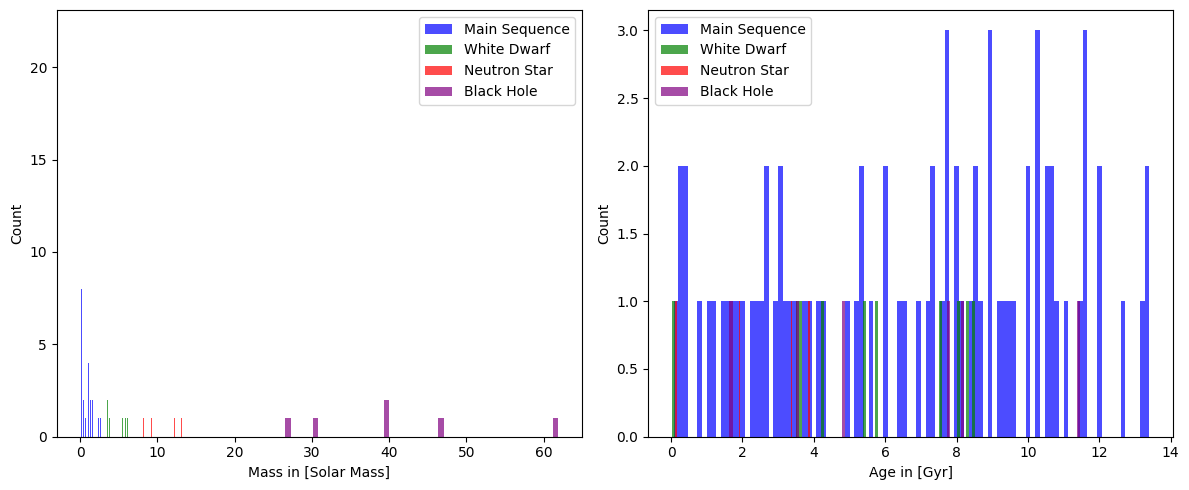

For 100 stars:
Main Sequence Fraction: 0.800
White Dwarf Fraction: 0.100
Neutron Star Fraction: 0.040
Black Hole Fraction: 0.060


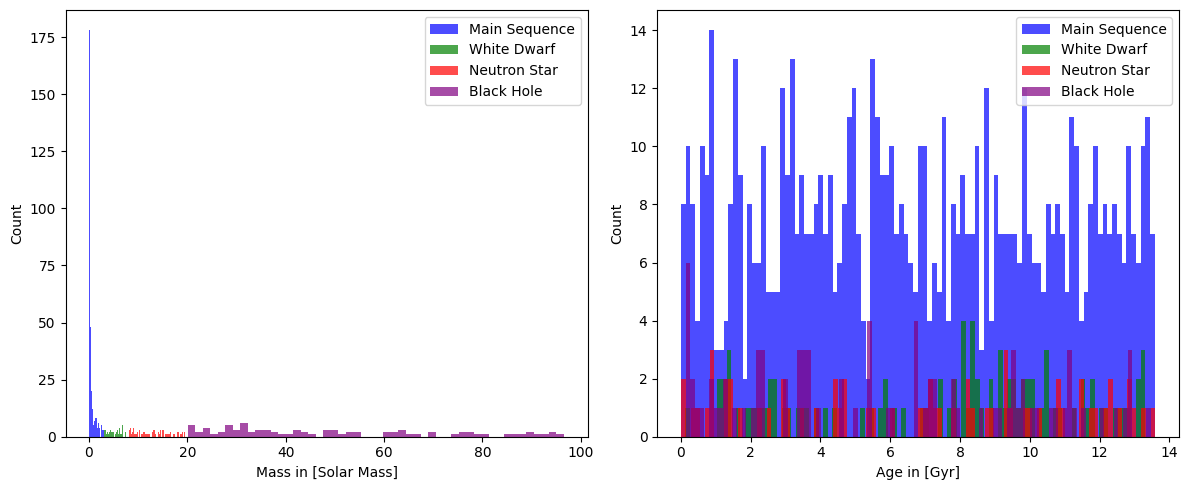

For 1000 stars:
Main Sequence Fraction: 0.760
White Dwarf Fraction: 0.092
Neutron Star Fraction: 0.063
Black Hole Fraction: 0.085


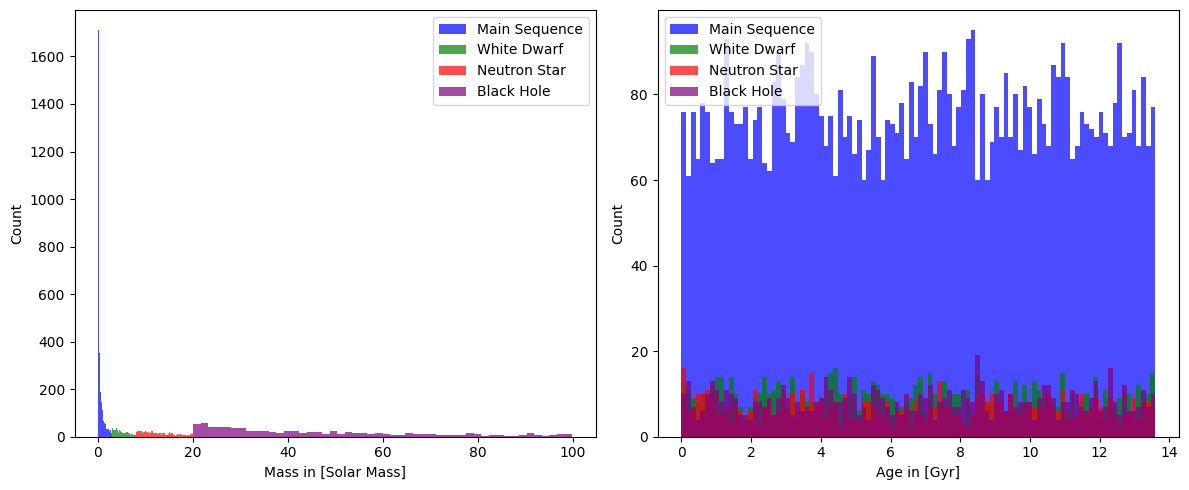

For 10000 stars:
Main Sequence Fraction: 0.750
White Dwarf Fraction: 0.096
Neutron Star Fraction: 0.069
Black Hole Fraction: 0.085


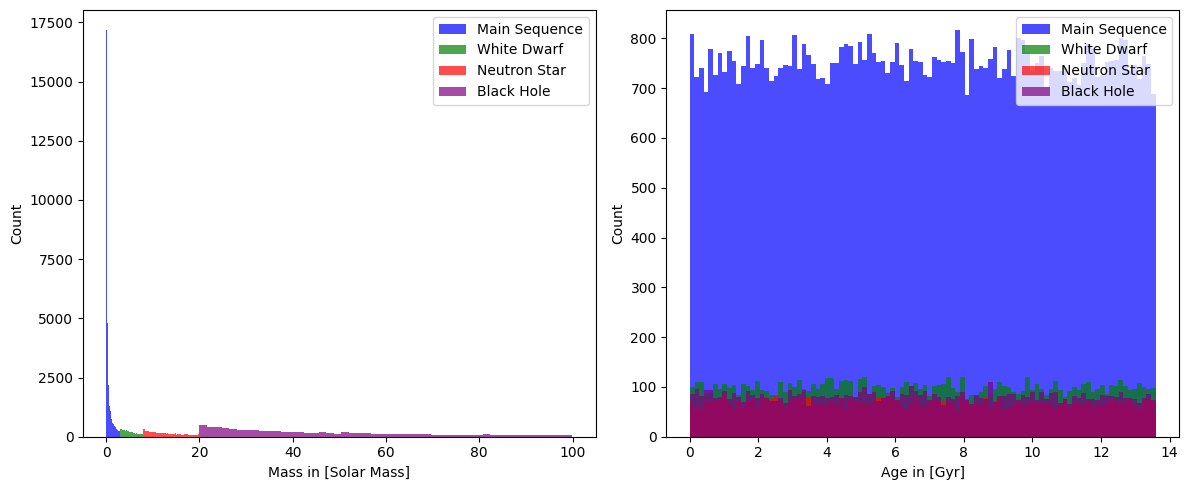

For 100000 stars:
Main Sequence Fraction: 0.752
White Dwarf Fraction: 0.099
Neutron Star Fraction: 0.068
Black Hole Fraction: 0.081


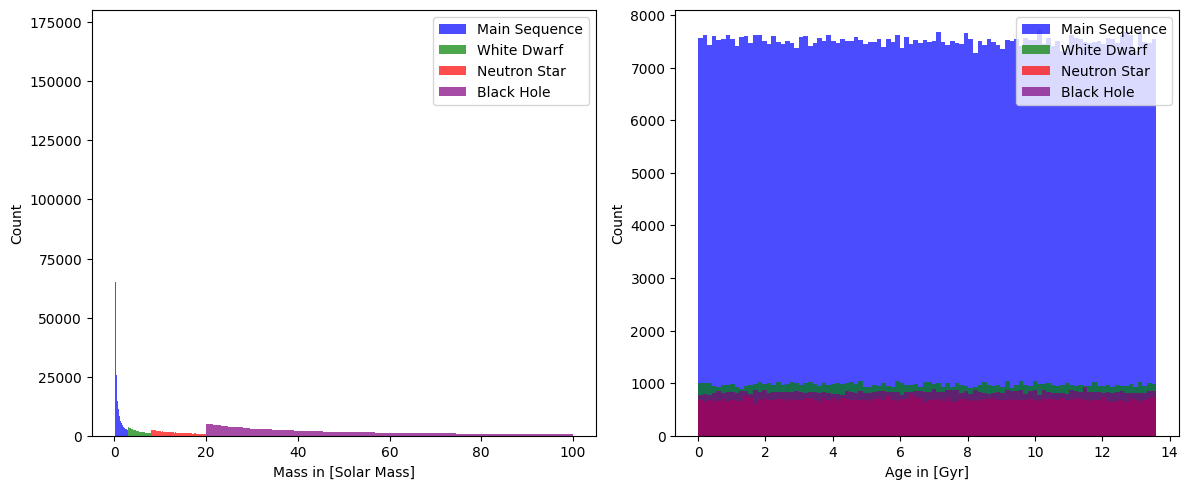

For 1000000 stars:
Main Sequence Fraction: 0.751
White Dwarf Fraction: 0.097
Neutron Star Fraction: 0.069
Black Hole Fraction: 0.083


In [3]:
# By Martín Gutiérrez

# Importing what's necessary

import numpy as np
import matplotlib.pyplot as plt

# Defining the mass range for stars
    
min_mass = 0.08    # Min mass in solar masses
max_mass = 100.0   # Max mass in solar masses

# Defining the Kroupa IMF parameters

alpha_1 = 0.3
alpha_2 = 1.3
alpha_3 = 2.3
M_break = 0.08

# How many stars

n_stars = [100, 1000, 10000, 100000, 1000000]

for n in n_stars:
    # Generating random masses based on the Kroupa IMF
    masses = []

    for i in range(n):
        while True:
            random_alpha = np.random.rand()
            if random_alpha < (1 / (1 - alpha_1)) * (M_break**(-alpha_1 + 1) - M_break**(-alpha_2 + 1)):
                m = (np.random.rand() * (M_break**(-alpha_1 + 1)))**(1 / (-alpha_1 + 1))
            elif random_alpha < (1 / (1 - alpha_1 - alpha_2)) * (M_break**(-alpha_2 + 1) - M_break**(-alpha_3 + 1)):
                m = (np.random.rand() * (M_break**(-alpha_2 + 1)))**(1 / (-alpha_2 + 1))
            else:
                m = (np.random.rand() * (M_break**(-alpha_3 + 1)))**(1 / (-alpha_3 + 1))

            # Checking if the generated mass is within the specified range
            if min_mass <= m <= max_mass:
                break

        # Assigning a random age within the Milky Way's age range
        
        age = np.random.uniform(0,13.6)  # Milky Way age range according to NASA

        masses.append((m, age))

    # Creating the lists for the diferent categories of stars and remnants
    
    main_seq_stars = []
    white_dwarfs = []
    neutron_stars = []
    black_holes = []

    #The mass ranges where selected by using the information given in the MC.pdf, the papers and the book from Carroll & Ostlie (2006)
    
    for mass, age in masses:
        if mass <= 3:
            main_seq_stars.append((mass, age))
        elif 3 < mass < 8.0:
            white_dwarfs.append((mass, age))
        elif 8.0 <= mass < 20.0:
            neutron_stars.append((mass, age))
        else:
            black_holes.append((mass, age))

    # Creating separate subplots for mass distribution and age distribution
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # For the mass distribution subplot
    
    ax1.hist([m for m, _ in main_seq_stars], bins=50, color='blue', alpha=0.7, label='Main Sequence')
    ax1.hist([m for m, _ in white_dwarfs], bins=50, color='green', alpha=0.7, label='White Dwarf')
    ax1.hist([m for m, _ in neutron_stars], bins=50, color='red', alpha=0.7, label='Neutron Star')
    ax1.hist([m for m, _ in black_holes], bins=50, color='purple', alpha=0.7, label='Black Hole')
    ax1.set_xlabel('Mass in [Solar Mass]')
    ax1.set_ylabel('Count')
    ax1.legend()

    # And now the age distribution subplot
    
    colors = ['blue', 'green', 'red', 'purple']
    labels = ['Main Sequence', 'White Dwarf', 'Neutron Star', 'Black Hole']

    for i, (category, color, label) in enumerate(zip([main_seq_stars, white_dwarfs, neutron_stars, black_holes], colors, labels)):
        ages = [age for _, age in category]
        ax2.hist(ages, bins=100, color=color, alpha=0.7, label=label)

    ax2.set_xlabel('Age in [Gyr]')
    ax2.set_ylabel('Count')
    ax2.legend()

    plt.tight_layout()
    plt.show()
    
    # Calculating and printing fractions of each type of star
    
    main_seq_fraction = len(main_seq_stars) / n
    white_dwarf_fraction = len(white_dwarfs) / n
    neutron_star_fraction = len(neutron_stars) / n
    black_hole_fraction = len(black_holes) / n
    
    print(f'For {n} stars:')
    print(f'Main Sequence Fraction: {main_seq_fraction:.3f}')
    print(f'White Dwarf Fraction: {white_dwarf_fraction:.3f}')
    print(f'Neutron Star Fraction: {neutron_star_fraction:.3f}')
    print(f'Black Hole Fraction: {black_hole_fraction:.3f}')

    

In [ ]:
# The plots both show a desired output, since the mass distribution plot shows much more main sequence stars than the other types.
# Although based on other sources the percentage should be around 90% but since this is a simulation with some strict parameters
# then there's not much to do about that but to change said parameters.
# About the age plot, with few stars it might look a bit funky but the last one shows a very constant amount of stars, which correlates
# with the data and information provided and thus it's considered a succes.

In [ ]:
#Kind of a flowchart but as text

"""
Start
|
|-- Define Constants (min_mass, max_mass, alpha_1, alpha_2, alpha_3, M_break)
|
|-- Initialize n_stars list (e.g., [100, 1000, 10000, 100000, 1000000])
|
|-- Loop through n_stars
|   |
|   |-- Generate Random Masses Based on Kroupa IMF
|   |   |
|   |   |-- Loop through n stars
|   |   |   |
|   |   |   |-- Generate Random Alpha
|   |   |   |-- Calculate m based on alpha and M_break
|   |   |   |-- Check if generated mass is within range
|   |   |   |   |-- If yes, break the loop
|   |   |   |
|   |   |   |-- Assign a Random Age within Milky Way's age range
|   |   |   |
|   |   |   |-- Append (mass, age) to masses list
|   |
|   |-- Perform Stellar Evolution and Categorize Stars
|   |   |
|   |   |-- Loop through masses
|   |   |   |
|   |   |   |-- Categorize stars into Main Sequence, White Dwarf, Neutron Star, Black Hole
|   |
|   |-- Create Mass Distribution Subplot
|   |
|   |-- Create Age Distribution Subplot
|   |
|   |-- Display Plots
|   |
|   |-- Calculate and Print Fractions
|
|-- End
"""